# Worksheet 23

Name:  Alvis Zou
UID: U90560271

### Topics

- Tuning Neural Networks

## Tuning Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

C:\Users\alvis\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


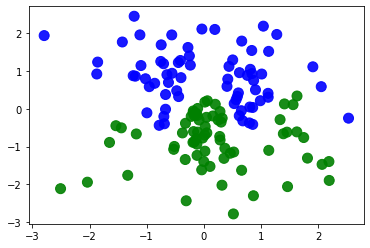

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.6093  
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2073 
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8279 
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7101 
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5778 
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3359 
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2742 
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2370 
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9562 
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6274 
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3510 
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0565 
Epoch 13/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7931 
Epoch 14/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5416 
Epoch 15/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4707 
Epoch 16/200
3/3 ━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2846 
Epoch 84/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2827 
Epoch 85/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2808 
Epoch 86/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2791 
Epoch 87/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2773 
Epoch 88/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2756 
Epoch 89/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2740 
Epoch 90/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2724 
Epoch 91/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2709 
Epoch 92/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2695 
Epoch 93/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2682 
Epoch 94/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2669 
Epoch 95/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2656 
Epoch 96/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2644 
Epoch 97/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2632 
Epoch 98/200
3/3 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2375 
Epoch 165/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2374 
Epoch 166/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2371 
Epoch 167/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2370 
Epoch 168/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2369 
Epoch 169/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2368 
Epoch 170/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2366 
Epoch 171/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2365 
Epoch 172/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2364 
Epoch 173/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2363 
Epoch 174/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2361 
Epoch 175/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2360 
Epoch 176/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2359 
Epoch 177/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2356 
Epoch 178/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2355 
Epoch 179

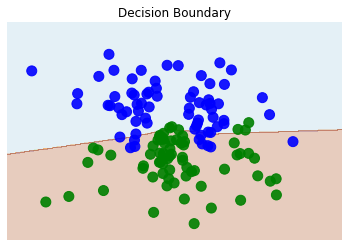

In [5]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, math, random, stack
from keras import layers, initializers
from keras.activations import relu

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(10, input_dim=2, activation="relu"))
model.add(layers.Dense(1, activation="tanh"))
model.compile(loss="binary_crossentropy")

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200)

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()